Face shape: (720, 1280, 3)


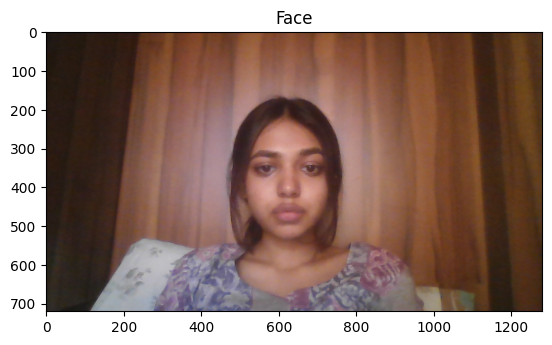

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Load face image
faceImage = cv2.imread('/content/WIN_20250909_13_32_43_Pro.jpg')
plt.imshow(faceImage[:,:,::-1]); plt.title("Face")
print("Face shape:", faceImage.shape)

Glass shape: (4016, 6016, 3)


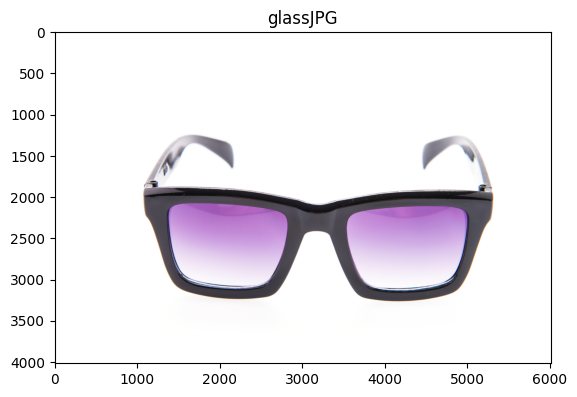

In [3]:
glassJPG = cv2.imread('/content/sunglasses-eyewear-isolated-white.jpg')
plt.imshow(glassJPG[:,:,::-1]); plt.title("glassJPG")
print("Glass shape:", glassJPG.shape)

Text(0.5, 1.0, 'Sunglass Color channels')

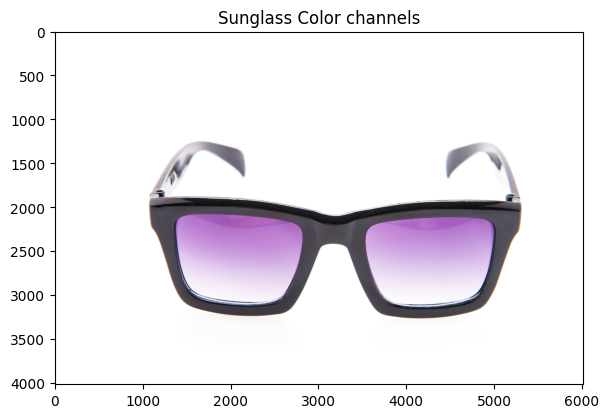

In [4]:
glassBGR = glassJPG[:,:,0:3]
glassGray = cv2.cvtColor(glassBGR, cv2.COLOR_BGR2GRAY)
_, glassMask1 = cv2.threshold(glassGray, 240, 255, cv2.THRESH_BINARY_INV)  # detect non-white

plt.figure(figsize=[15,15])
#Show sunglasses color channels
plt.subplot(121)
plt.imshow(glassBGR[:,:,::-1])  # BGR → RGB
plt.title('Sunglass Color channels')

Text(0.5, 1.0, 'Sunglass Mask (generated)')

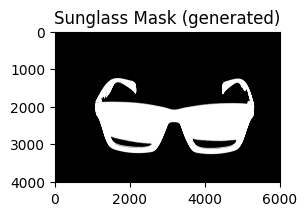

In [5]:
plt.subplot(122)
plt.imshow(glassMask1, cmap='gray')
plt.title('Sunglass Mask (generated)')

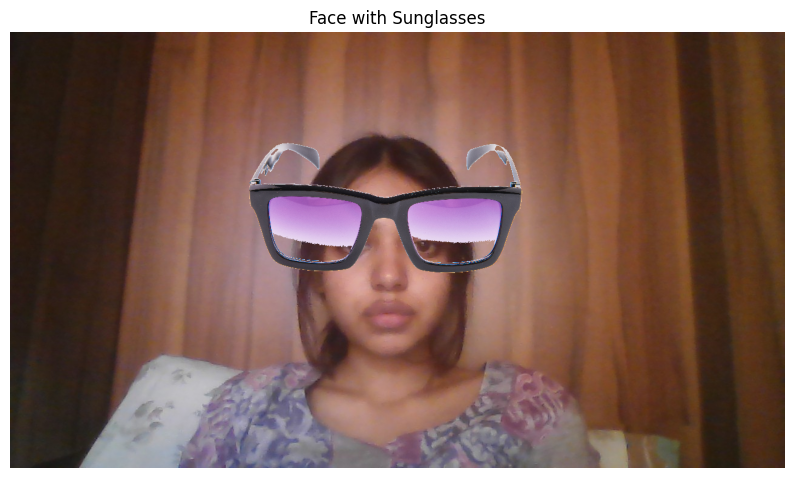

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Load images
faceImage = cv2.imread('/content/WIN_20250909_13_32_43_Pro.jpg')
glassJPG = cv2.imread('/content/sunglasses-eyewear-isolated-white.jpg')

#Check if images loaded correctly
if faceImage is None or glassJPG is None:
    print("Error: Check your file paths!")
else:
    face_h, face_w, _ = faceImage.shape

    #Resize glasses to ~50% of face width
    new_w = int(face_w * 0.5)
    new_h = int(new_w * glassJPG.shape[0] / glassJPG.shape[1])
    glass_resized = cv2.resize(glassJPG, (new_w, new_h))

    #Create mask
    glass_gray = cv2.cvtColor(glass_resized, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(glass_gray, 225, 255, cv2.THRESH_BINARY_INV)
    mask_inv = cv2.bitwise_not(mask)

    # Adjusted position to place glasses on eyes
    x = int(face_w * 0.22)   # x offset (centered)
    y = int(face_h * 0.07)   # y offset (move up from nose to eyes)

    #ROI on face
    roi = faceImage[y:y+new_h, x:x+new_w]

    if roi.shape[0] > 0 and roi.shape[1] > 0:
        bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
        fg = cv2.bitwise_and(glass_resized, glass_resized, mask=mask)
        combined = cv2.add(bg, fg)
        faceImage[y:y+new_h, x:x+new_w] = combined

    #Show result
    plt.figure(figsize=[10,10])
    plt.imshow(cv2.cvtColor(faceImage, cv2.COLOR_BGR2RGB))
    plt.title("Face with Sunglasses")
    plt.axis("off")
    plt.show()